### Network Analysis

#### Data preparation

In [1]:
# import libraries
import numpy as np # version: 1.23.2
import pandas as pd # version: 1.5.0
import seaborn as sns # version: 0.11.2
import matplotlib.pyplot as plt # version: 3.5.2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load the merged dataset
df_AAVE=pd.read_csv('Output_Data/AAVE_Merged_Datasets_New.csv',index_col="time").drop(columns="Unnamed: 0")
df_AAVE.index=pd.to_datetime(df_AAVE.index)
df_AAVE.head()

,num_nodes,num_edges,Degree mean,Degree std,Top10Degree mean,Top10Degree std,Top10 Degree mean ratio,DCmean,DCstd,clustermean,clusterstd,modularity,transitivity,eig_mean,eig_std,closenessmean,closenessstd,Components_cnt,giant_com_ratio,token,core_cnt,core_ratio,avg_core_neighbor,relative_degree,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktEstUSD,CapMrktFFUSD,CapRealUSD,IssTotNtv,IssTotUSD,NDF,NVTAdj,NVTAdj90,NVTAdjFF,NVTAdjFF90,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateBTC,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SER,SplyAct10yr,SplyAct180d,SplyAct1d,SplyAct1yr,SplyAct2yr,SplyAct30d,SplyAct3yr,SplyAct4yr,SplyAct5yr,SplyAct7d,SplyAct90d,SplyActEver,SplyActPct1yr,SplyAdrBal1in100K,SplyAdrBal1in100M,SplyAdrBal1in10B,SplyAdrBal1in10K,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-10,1244,1585,2.548232,10.116223,78.2,80.487128,30.687950,0.002050,0.008139,0.023842,0.139477,0.732609,0.002543,0.011381,0.025978,0.181661,0.067483,53,0.899518,AAVE,1,0.000804,299.000000,0.002050,1244.0,1286.0,63557.0,78559.0,262.0,36287.0,70576.0,66.0,8583.0,85262.0,79796.0,71242.0,66769.0,1884.0,15.0,13103.0,113.0,43825.0,360.0,4.0,57271.0,736.0,69929.0,4051.0,43.0,76084.0,25564.0,184.0,1.625967e+09,3.798553e+09,1.218846,0.975623,4.735088e+09,3.798409e+09,3.790191e+09,3.884893e+09,0.0,0.0,0.941623,118.827828,24.122183,95.115466,19.308546,0.008805,295.943012,NaN,-5.077254,304.714105,0.008985,0.141479,256.739634,304.714105,0.001326,1.283542e+07,1.233657e+07,7.709996e+06,1.283542e+07,1.283542e+07,8.793320e+06,1.283542e+07,1.283542e+07,1.283542e+07,8.117212e+06,1.106833e+07,1.283542e+07,80.221378,1.552494e+07,1.599930e+07,1.600000e+07,1.506598e+07,1.597953e+07,1.599995e+07,1.387631e+07,1.582389e+07,1.600000e+07,1.599996e+07,1.599971e+07,1.598863e+07,1.587987e+07,1.559815e+07,1.190714e+07,1.447286e+07,1.518690e+07,8.398426e+06,1.599999e+07,1.599994e+07,1.599779e+07,1.539713e+07,1.572047e+07,1.335634e+07,1.595405e+07,1.487704e+07,1.432679e+07,1.582297e+07,1.543255e+07,16000000.0,1.280716e+07,2095.0,0.024248,2615.0,134648.594291,3.984831e+07,85.727831,25370.552650,7.530655,2228.644794,12.070423,0.086527,0.080198
2021-07-11,1422,1753,2.465541,12.415961,95.5,116.110340,38.733885,0.001735,0.008737,0.015378,0.111771,0.734706,0.001338,0.011120,0.024083,0.188941,0.071583,60,0.897328,AAVE,2,0.001406,261.000000,0.001735,1422.0,1289.0,63649.0,78445.0,261.0,36347.0,70666.0,66.0,8605.0,85154.0,79683.0,71124.0,66867.0,1890.0,15.0,13137.0,113.0,43898.0,358.0,4.0,57592.0,748.0,70040.0,4141.0,45.0,76067.0,25947.0,188.0,1.626054e+09,3.910851e+09,1.233876,0.987744,4.874625e+09,3.910489e+09,3.902242e+09,3.950661e+09,0.0,0.0,0.941486,124.930368,25.276366,100.009448,20.234275,0.008893,304.664034,NaN,7.396408,295.945170,0.008805,0.139790,249.581103,295.945170,0.001328,1.283660e+07,1.233568e+07,7.562734e+06,1.283660e+07,1.283660e+07,8.78

In [3]:
df_AAVE['core_cnt'][230]=2
df_AAVE['core_ratio'][230] = 2/df_AAVE['num_nodes'][230]
df_AAVE['avg_core_neighbor'][230] = 217.8 # average of past 5 days

<ipython-input-3-01cde6f901e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAVE['core_cnt'][230]=2
<ipython-input-3-01cde6f901e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAVE['core_ratio'][230] = 2/df_AAVE['num_nodes'][230]
<ipython-input-3-01cde6f901e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AAVE['avg_core_neighbor'][230] = 217.8 # average of past 5 days


In [4]:
#Read the core_cnt dataset
core_cnt_type=pd.read_csv('Output_Data/core_date_cnt_type_new.csv')
core_cnt_type.head()

,Address,Days_count,Type
0,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,356,Address
1,0x28c6c06298d514db089934071355e5743bf21d60,258,Address
2,0x4da27a545c0c5b758a6ba100e3a049001de870f5,221,Contract
3,0x5ab53ee1d50eef2c1dd3d5402789cd27bb52c1bb,201,Contract
4,0xd75ea151a61d06868e31f8988d28dfe5e9df57b4,195,Contract


In [5]:
#Read the significant tests dataset
core_sig=pd.read_csv('Output_Data/cp_test_results_new.csv')
#core_sig = core_sig[0:24]
core_sig['Date'] = pd.to_datetime(core_sig['date'])
len(core_sig)

365

In [6]:
df_AAVE['cp_test_pvalue'] = core_sig["p_value"].tolist()
sig = [0.05 for i in range(365)]
core_sig.head()

,date,p_value,Date
0,2021/07/10,0.000994,2021-07-10
1,2021/07/11,0.004091,2021-07-11
2,2021/07/12,0.042098,2021-07-12
3,2021/07/13,0.001877,2021-07-13
4,2021/07/14,0.002749,2021-07-14


In [7]:
# Complete the significant_test dataset
core_cnt_df = pd.DataFrame({'core_cnt':df_AAVE['core_cnt'],'Date':df_AAVE.index})
avg_core_neighbor_df = pd.DataFrame({'avg_core_neighbor':df_AAVE['avg_core_neighbor'],'Date':df_AAVE.index})
sig_df =core_sig.merge(core_cnt_df, on = 'Date',how = 'inner')
sig_df=sig_df.merge(avg_core_neighbor_df, on = 'Date',how = 'inner')
sig_df.head()

,date,p_value,Date,core_cnt,avg_core_neighbor
0,2021/07/10,0.000994,2021-07-10,1,299.000000
1,2021/07/11,0.004091,2021-07-11,2,261.000000
2,2021/07/12,0.042098,2021-07-12,1,113.600000
3,2021/07/13,0.001877,2021-07-13,10,75.000000
4,2021/07/14,0.002749,2021-07-14,9,92.222222


In [61]:
sig_df['significant'] = sig_df["p_value"].apply(lambda x: 0 if x>=0.05 else 1)
sig_df['insignificant'] = sig_df["p_value"].apply(lambda x: 1 if x>=0.05 else 0)
sig_df['significance'] = sig_df["significant"].apply(lambda x: True if x==1 else False)
df_AAVE['cp_significance'] = sig_df['significant'].tolist()
sig_df.head()

,date,p_value,Date,core_cnt,avg_core_neighbor,significant,insignificant,significance
0,2021/07/10,0.000994,2021-07-10,1,299.000000,1,0,True
1,2021/07/11,0.004091,2021-07-11,2,261.000000,1,0,True
2,2021/07/12,0.042098,2021-07-12,1,113.600000,1,0,True
3,2021/07/13,0.001877,2021-07-13,10,75.000000,1,0,True
4,2021/07/14,0.002749,2021-07-14,9,92.222222,1,0,True


#### Visualization (Time-series Plots & Correlation Heatmap)

##### Distribution on significant & insignificant days

In [9]:
sig_df_True = sig_df[sig_df['significance']==True]
sig_df_False = sig_df[sig_df['significance']==False]

cnt_sig_True = sig_df_True['core_cnt'].tolist()
cnt_sig_False = sig_df_False['core_cnt'].tolist()
neighbor_sig_True = sig_df_True['avg_core_neighbor'].tolist()
neighbor_sig_False = sig_df_False['avg_core_neighbor'].tolist()

cnt_sig_True = pd.Series(np.array(cnt_sig_True))
cnt_sig_False = pd.Series(np.array(cnt_sig_False))

neighbor_sig_True = pd.Series(np.array(neighbor_sig_True))
neighbor_sig_False = pd.Series(np.array(neighbor_sig_False))

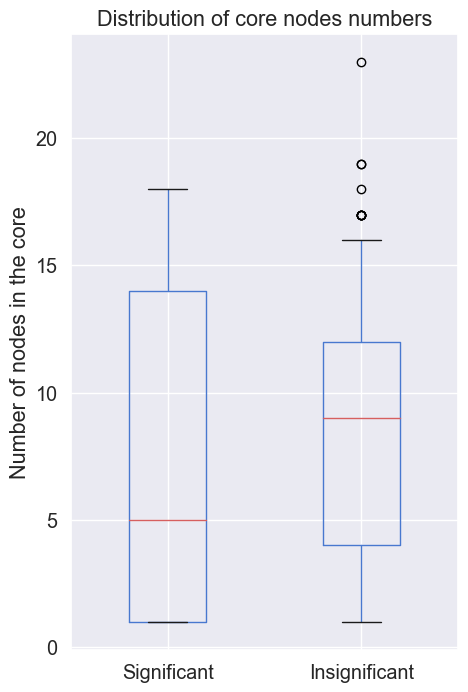

In [62]:
plt.style.use('seaborn-muted')
plt.figure(figsize=(5, 8))
dt = pd.DataFrame({'Significant':cnt_sig_True, 'Insignificant':cnt_sig_False})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Distribution of core nodes numbers')
plt.ylabel('Number of nodes in the core')
plt.rc('font', size=13) # controls default text sizes

##### Distribution on average number of neighbors of core nodes

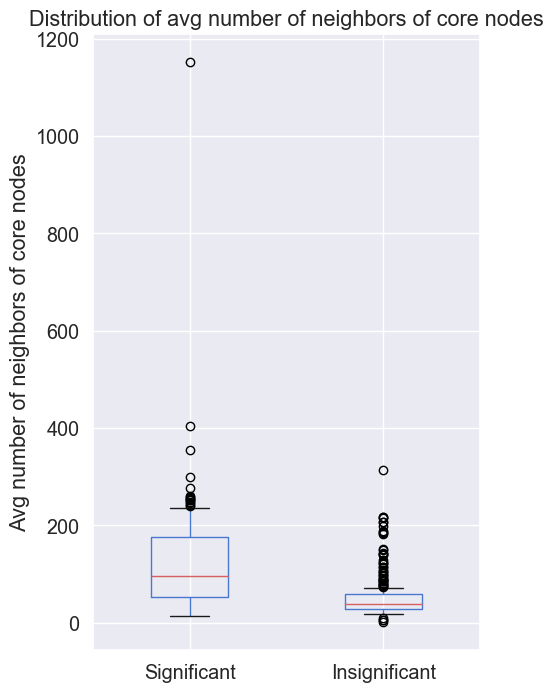

In [63]:
plt.figure(figsize=(5, 8))
dt = pd.DataFrame({'Significant':neighbor_sig_True, 'Insignificant':neighbor_sig_False})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Distribution of avg number of neighbors of core nodes')
plt.ylabel('Avg number of neighbors of core nodes')
plt.rc('font', size=13)

##### Core days count distribution of CA(contract accounts/smart contracts) and EOA (externally owned accounts)

In [12]:
core_contract = core_cnt_type[core_cnt_type['Type']=="Contract"]
core_address = core_cnt_type[core_cnt_type['Type']=="Address"]

core_contract = core_contract['Days_count'].tolist()
core_address = core_address['Days_count'].tolist()

core_contract = pd.Series(np.array(core_contract))
core_address = pd.Series(np.array(core_address))

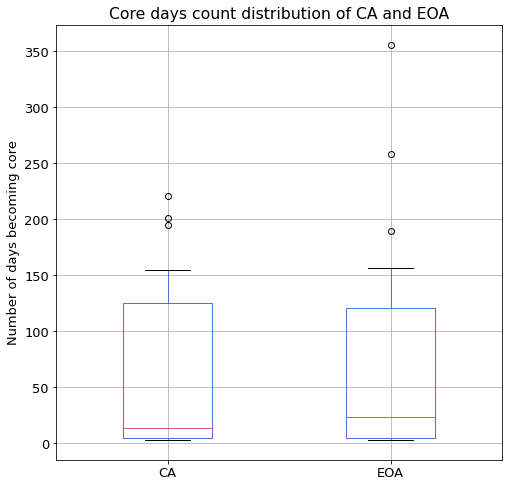

In [13]:
#Core days count distribution of CA and EOA
plt.style.use('seaborn-muted')
plt.figure(figsize=(8, 8))
dt = pd.DataFrame({'CA':core_contract, 'EOA':core_address})
dt.boxplot(widths = 0.4,whis=0.5)
plt.title('Core days count distribution of CA and EOA')
plt.ylabel('Number of days becoming core')
plt.rc('font', size=15) # controls default text sizes

##### Network Dynamics (Time-series Plot)

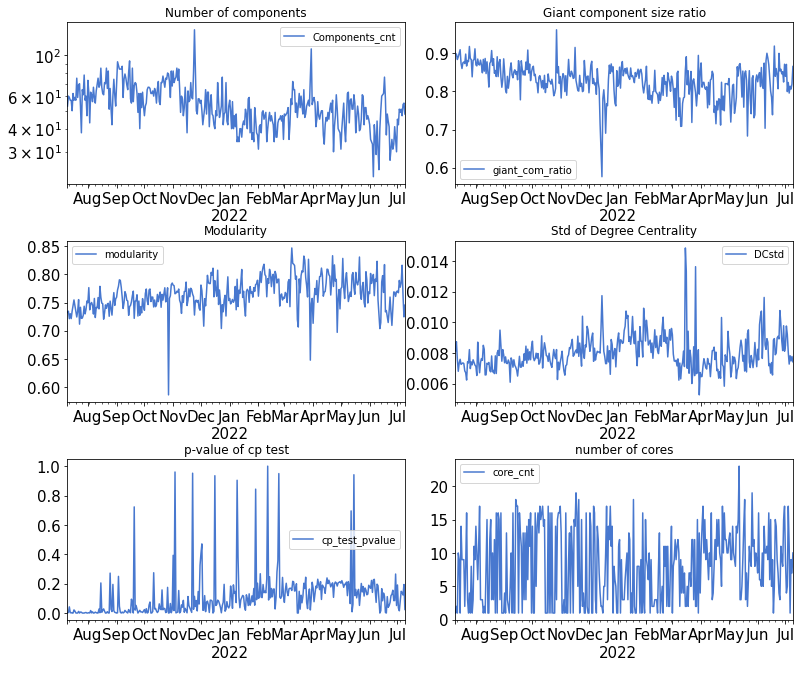

In [14]:
fig,axes = plt.subplots(3,2)
plt.style.use('default')
ax = df_AAVE[['Components_cnt']].plot(ax = axes[0,0], figsize=(13,10), grid=False, title='Number of components',xlabel=' ')
ax.set_yscale('log')
df_AAVE[['giant_com_ratio']].plot(ax = axes[0,1], figsize=(13,7), grid=False, title='Giant component size ratio',xlabel=' ')
df_AAVE[['modularity']].plot(ax = axes[1,0], figsize=(13,7), grid=False, title='Modularity',xlabel=' ')
df_AAVE[['DCstd']].plot(ax = axes[1,1], figsize=(13,7), grid=False, title='Std of Degree Centrality',xlabel=' ')
df_AAVE[['cp_test_pvalue']].plot(ax = axes[2,0], figsize=(13,11), grid=False, title='p-value of cp test',xlabel=' ')
df_AAVE[['core_cnt']].plot(ax = axes[2,1], figsize=(13,11), grid=False, title='number of cores',xlabel=' ')
plt.subplots_adjust(wspace =0.15, hspace =0.35)

##### Correlations of network features

In [15]:
columns_X_before_trans = ['Components_cnt','giant_com_ratio','modularity','DCstd','cp_significance']
df_AAVE_network = df_AAVE[columns_X_before_trans]
df_Heatmap = df_AAVE_network.corr()

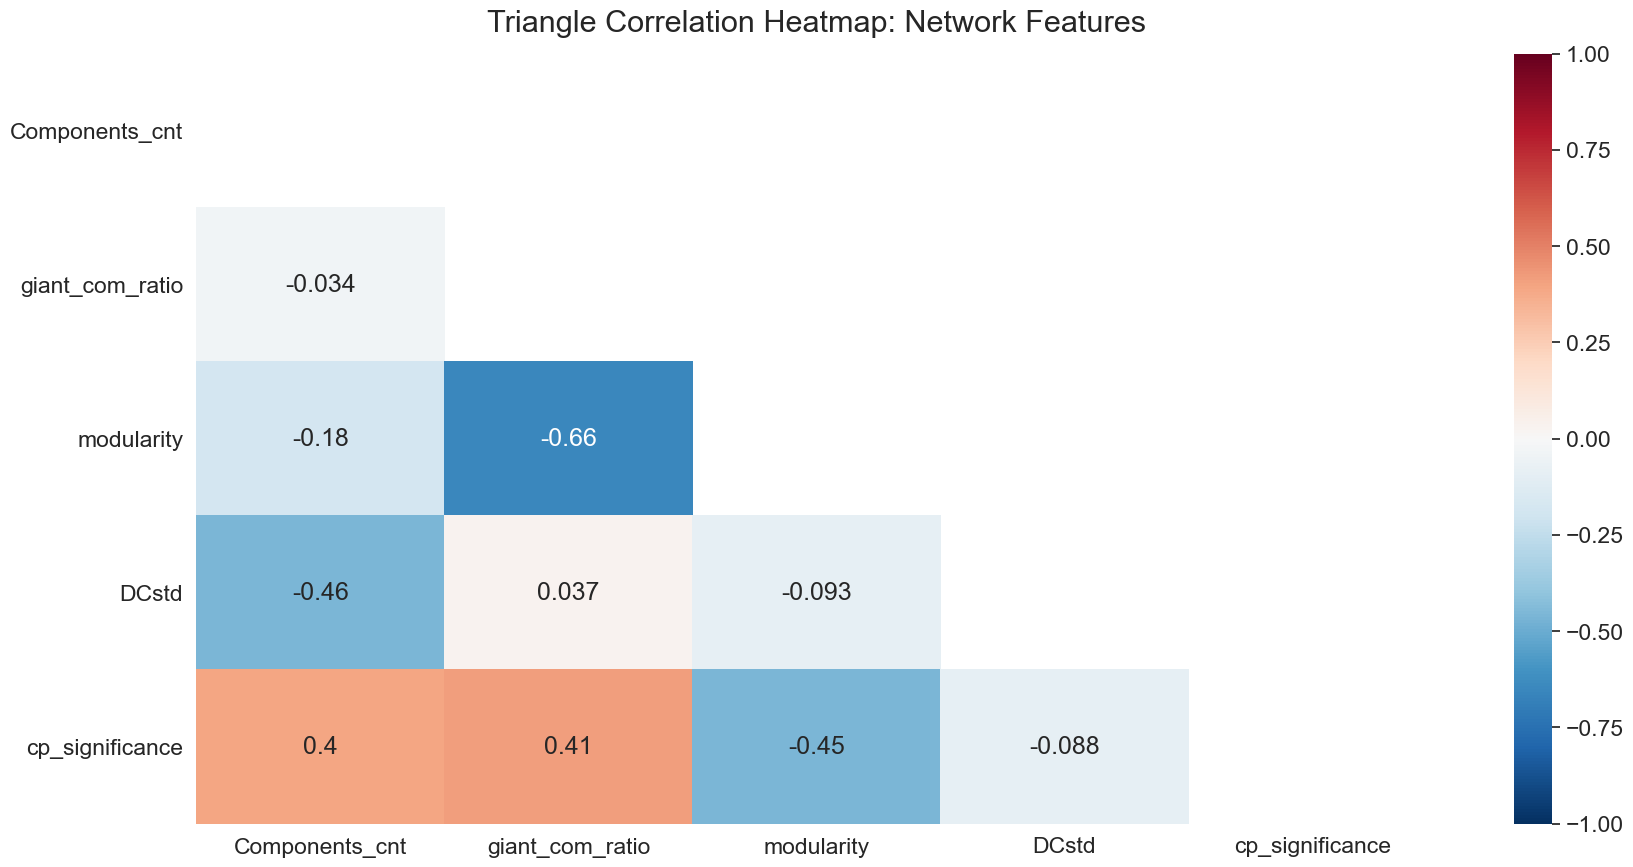

In [16]:
# plot triangle correlation heatmap
plt.style.use('default')
plt.figure(figsize=(20, 10))
#triangle
mask = np.triu(np.ones_like(df_AAVE_network.corr(), dtype=np.bool))
sns.set(font_scale=1.5) 
heatmap = sns.heatmap(df_AAVE_network.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu_r') 
heatmap.set_title('Triangle Correlation Heatmap: Network Features', fontdict={'fontsize':22}, pad=16);
heatmap.set_facecolor((1,1,1))

### Regression Analysis

#### Stationary Test

In [17]:
# import libraries
from math import sqrt 
from scipy import stats # version: 1.9.1
import statsmodels.api as sm # version: 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
#creating a function to plot the graph and show the test result:
def check_stationarity(y, column, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title(column)
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Distribution')

    plt.tight_layout()
    
    print('Dickey-Fuller test results:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Statistical Test','P-Value','Used Lags','Observations Number'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Values (%s)"%key] = value.round(4)
        
    print(adftest)

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dickey-Fuller test results:
Statistical Test          -8.3763
P-Value                    0.0000
Used Lags                  2.0000
Observations Number      362.0000
Critical Values (1%)      -3.4485
Critical Values (5%)      -2.8696
Critical Values (10%)     -2.5710
dtype: float64


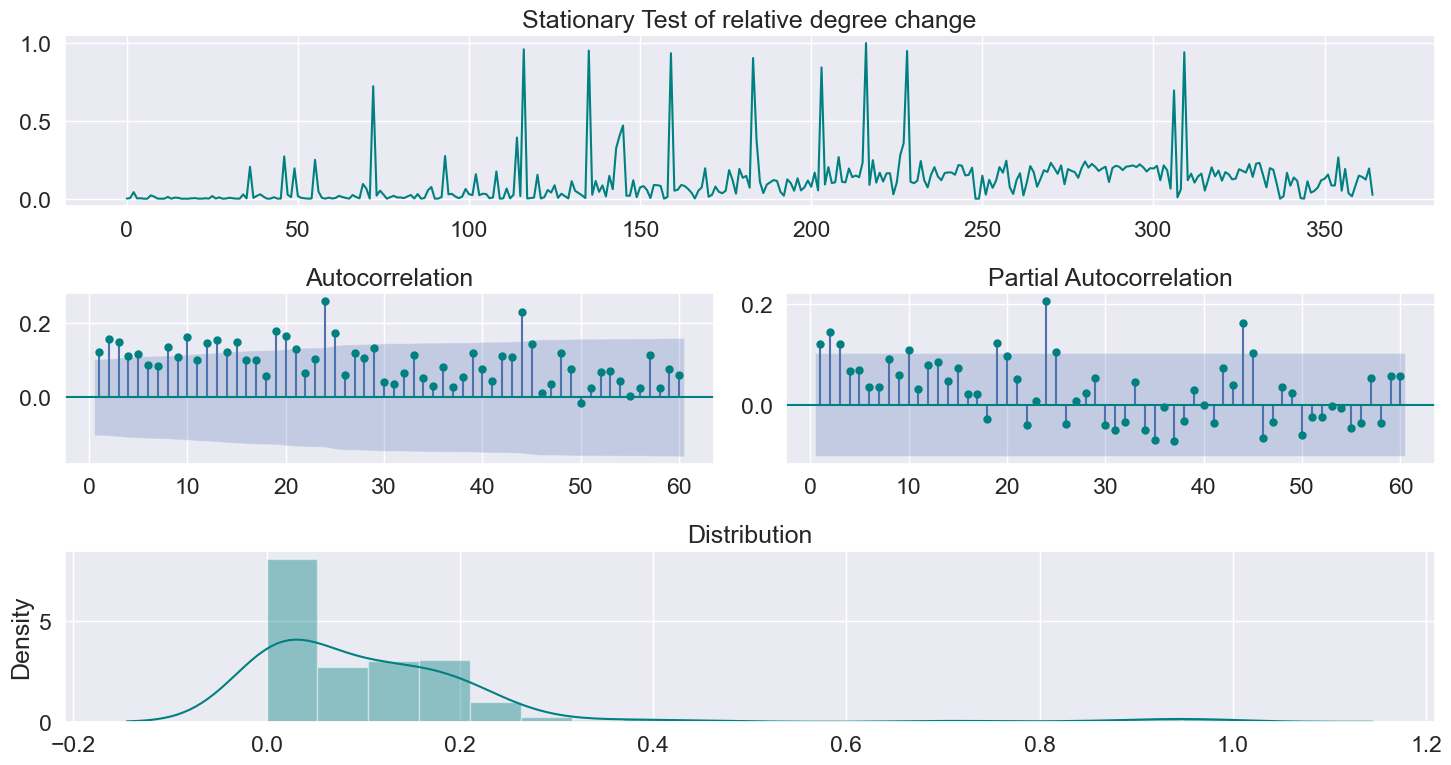

In [19]:
check_stationarity(core_sig["p_value"].tolist(), "Stationary Test of relative degree change",lags_plots=60)

#### Variable Transformation

In [20]:
columns_X_before_trans = ['Components_cnt','giant_com_ratio','modularity','DCstd','cp_significance']
df_AAVE_network = df_AAVE[columns_X_before_trans]

In [21]:
# add stable network features
df_AAVE['component_cnt_change'] = pd.DataFrame(df_AAVE['Components_cnt'].diff().dropna())
df_AAVE['giant_com_ratio_change'] = pd.DataFrame(df_AAVE['giant_com_ratio'].diff().dropna())
df_AAVE['core_cnt_change'] = pd.DataFrame(df_AAVE['core_cnt'].diff().dropna())
df_AAVE['core_ratio_change'] = pd.DataFrame(df_AAVE['core_ratio'].diff().dropna())
df_AAVE['avg_core_neighbor_change'] = pd.DataFrame(df_AAVE['avg_core_neighbor'].diff().dropna())

df_AAVE['DCstd_log_diff'] = pd.DataFrame(np.log(df_AAVE['DCstd']).diff().dropna())

df_AAVE['Top10_ratio_change'] = pd.DataFrame(np.log(df_AAVE['Top10 Degree mean ratio']).diff().dropna())
df_AAVE['relative_degree_change'] = pd.DataFrame(df_AAVE['relative_degree'].diff().dropna())
df_AAVE['modularity_log_diff'] = pd.DataFrame(np.log(df_AAVE['modularity']).diff().dropna())

df_AAVE['significant'] = sig_df['significant'].tolist()
df_AAVE['core_cnt_significant'] = df_AAVE['significant']*df_AAVE['core_cnt_change']
df_AAVE['core_ratio_significant'] = df_AAVE['significant']*df_AAVE['core_ratio_change']
df_AAVE['avg_core_neighbor_significant'] = df_AAVE['significant']*df_AAVE['avg_core_neighbor_change']

In [22]:
columns_X = ['component_cnt_change','giant_com_ratio_change','core_cnt_change','core_ratio_change','avg_core_neighbor_change',
                                                    'Degree_std_diff','Top10_ratio_change','relative_degree_change','modularity_log_diff','significant']

#### PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # version: 0.23.2
trans = MinMaxScaler()
df_AAVE_network = trans.fit_transform(df_AAVE_network)
df_AAVE_network = pd.DataFrame(df_AAVE_network)
df_AAVE_network.rename(columns={0: 'Components_cnt',
  1: 'giant_com_ratio',
  2: 'modularity',
  3: 'DCstd',
  4: 'cp_significance'
  }, inplace=True)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(3)
pca.fit(df_AAVE_network)
print(pca.components_)

[[ 0.10466115  0.10563772 -0.10678899 -0.02391669  0.98280762]
 [-0.59962477  0.41819601 -0.29243204  0.6164748   0.00213232]
 [-0.30454942 -0.63215552  0.56433302  0.39971311  0.17142554]]


In [25]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.83682786, 0.91066373, 0.9604514 ])

In [26]:
# PCA interpretation
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['Variable'] = df_AAVE_network.columns.values
loadings_df = loadings_df.set_index('Variable')
loadings_df

,PC1,PC2,PC3
Variable,,,
Components_cnt,0.104661,-0.599625,-0.304549
giant_com_ratio,0.105638,0.418196,-0.632156
modularity,-0.106789,-0.292432,0.564333
DCstd,-0.023917,0.616475,0.399713
cp_significance,0.982808,0.002132,0.171426


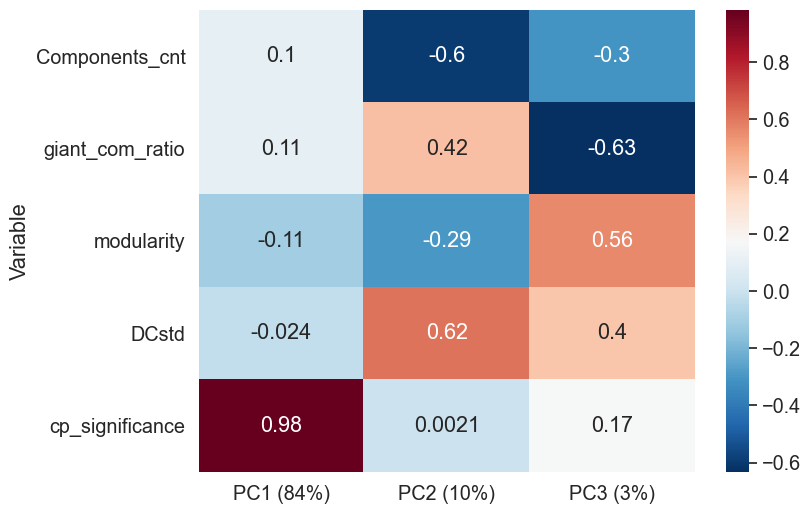

In [27]:
loadings_df.rename(columns={'PC1': 'PC1 (84%)',
  'PC2': 'PC2 (10%)',
  'PC3': 'PC3 (3%)',
  }, inplace=True)

plt.style.use('seaborn-pastel')
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.3) 
ax = sns.heatmap(loadings_df, annot=True, cmap='RdBu_r')
plt.show()

In [28]:
network_features = np.array(df_AAVE_network)

pca_coef1 = np.array(pca.components_.tolist()[0])
pca_coef2 = np.array(pca.components_.tolist()[1])
pca_coef3 = np.array(pca.components_.tolist()[2])

compt1 = np.dot(network_features, pca_coef1)
compt2 = np.dot(network_features, pca_coef2)
compt3 = np.dot(network_features, pca_coef3)

In [29]:
PCA = pd.DataFrame({'compt1':compt1,'compt2':compt2,'compt3':compt3})
PCA.head()

,compt1,compt2,compt3
0,1.032532,0.211922,-0.004460
1,1.035950,0.209244,0.010119
2,1.039609,0.140376,-0.041624
3,1.038073,0.098455,-0.061449
4,1.042902,0.154130,-0.073108


In [30]:
df_AAVE['compt1'] = PCA['compt1'].tolist()
df_AAVE['compt2'] = PCA['compt2'].tolist()
df_AAVE['compt3'] = PCA['compt3'].tolist()

#### Analysis for Dependent variable ROI

##### Preparation

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.core.display import Latex

In [32]:
columns_X = ['component_cnt_change','giant_com_ratio_change','core_cnt_change','core_ratio_change','avg_core_neighbor_change','DCstd_log_diff','Top10_ratio_change',
                'relative_degree_change','modularity_log_diff', 'cp_test_pvalue','significant','core_cnt_significant','core_ratio_significant','avg_core_neighbor_significant']

In [33]:
# 7-days moving average of network variables
df_AAVE['component_cnt_change7'] = df_AAVE['component_cnt_change'].rolling(window=7).mean()
df_AAVE['giant_com_ratio_change7']=df_AAVE['giant_com_ratio_change'].rolling(window=7).mean()
df_AAVE['core_cnt_change7']=df_AAVE['core_cnt_change'].rolling(window=7).mean()
df_AAVE['core_ratio_change7']=df_AAVE['core_ratio_change'].rolling(window=7).mean()
df_AAVE['avg_core_neighbor_change7']=df_AAVE['avg_core_neighbor_change'].rolling(window=7).mean()
df_AAVE['DCstd_log_diff7']=df_AAVE['DCstd_log_diff'].rolling(window=7).mean()
df_AAVE['Top10_ratio_change7']=df_AAVE['Top10_ratio_change'].rolling(window=7).mean()
df_AAVE['relative_degree_change7']=df_AAVE['relative_degree_change'].rolling(window=7).mean()
df_AAVE['modularity_log_diff7']=df_AAVE['modularity_log_diff'].rolling(window=7).mean()

df_AAVE['cp_test_pvalue7']=df_AAVE['cp_test_pvalue'].rolling(window=7).mean()

In [34]:
columns_X7 = ['component_cnt_change7','giant_com_ratio_change7','core_cnt_change7','core_ratio_change7','avg_core_neighbor_change7',
                                                                    'DCstd_log_diff7','Top10_ratio_change7','relative_degree_change7','modularity_log_diff7','cp_test_pvalue7']

##### cp significance

In [35]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X]
  dfROIdays=dfROIdays.dropna()

  #Run the regression benchmark
  olsname = column2+""
  #cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  significant = smf.ols(column2+' ~ 1+ significant', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  #core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change+core_cnt_significant', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  #core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change+core_ratio_significant', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  #avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change+avg_core_neighbor_significant', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  return significant

def display_rd_roi_sig ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  #stargazer.covariate_order(['DCmean_ratio_change','Intercept'])
  return(HTML(stargazer.render_html()))

In [36]:
display_rd_roi_sig ()

##### Change of giant com ratio

In [37]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression_movingaverage(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  compt = ['compt1','compt2','compt3']
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X7+compt]
  dfROIdays=dfROIdays.dropna()

  
  trans = MinMaxScaler()
  dfROIdays = trans.fit_transform(dfROIdays)
  dfROIdays = pd.DataFrame(dfROIdays)

  dfROIdays.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  compt = smf.ols(column2+' ~ 1+ PC1 +PC2+PC3', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return giant_com_ratio

def display_rd_roi_movingaverage ():
  day1 = regression_movingaverage(1)
  week1 = regression_movingaverage(7)
  week2 = regression_movingaverage(14)
  week3 = regression_movingaverage(21)
  week4 = regression_movingaverage(28)
  week5 = regression_movingaverage(35)
  week6 = regression_movingaverage(42)
  week7 = regression_movingaverage(49)
  week8 = regression_movingaverage(56)
  days90 = regression_movingaverage(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['giant_com_ratio_change7','Intercept'])
  return(HTML(stargazer.render_html()))

In [38]:
display_rd_roi_movingaverage ()

##### component cnt

In [39]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression_movingaverage(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  compt = ['compt1','compt2','compt3']
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X7+compt]
  dfROIdays=dfROIdays.dropna()

  
  trans = MinMaxScaler()
  dfROIdays = trans.fit_transform(dfROIdays)
  dfROIdays = pd.DataFrame(dfROIdays)

  dfROIdays.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  compt = smf.ols(column2+' ~ 1+ PC1 +PC2+PC3', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return component_cnt

def display_rd_roi_movingaverage ():
  day1 = regression_movingaverage(1)
  week1 = regression_movingaverage(7)
  week2 = regression_movingaverage(14)
  week3 = regression_movingaverage(21)
  week4 = regression_movingaverage(28)
  week5 = regression_movingaverage(35)
  week6 = regression_movingaverage(42)
  week7 = regression_movingaverage(49)
  week8 = regression_movingaverage(56)
  days90 = regression_movingaverage(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['component_cnt_change7','Intercept'])
  return(HTML(stargazer.render_html()))

In [40]:
display_rd_roi_movingaverage ()

##### Log(modularity)

In [41]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression_movingaverage(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  compt = ['compt1','compt2','compt3']
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X7+compt]
  dfROIdays=dfROIdays.dropna()

  
  trans = MinMaxScaler()
  dfROIdays = trans.fit_transform(dfROIdays)
  dfROIdays = pd.DataFrame(dfROIdays)

  dfROIdays.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  compt = smf.ols(column2+' ~ 1+ PC1 +PC2+PC3', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return Modularity

def display_rd_roi_movingaverage ():
  day1 = regression_movingaverage(1)
  week1 = regression_movingaverage(7)
  week2 = regression_movingaverage(14)
  week3 = regression_movingaverage(21)
  week4 = regression_movingaverage(28)
  week5 = regression_movingaverage(35)
  week6 = regression_movingaverage(42)
  week7 = regression_movingaverage(49)
  week8 = regression_movingaverage(56)
  days90 = regression_movingaverage(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['modularity_log_diff7','Intercept'])
  return(HTML(stargazer.render_html()))

In [42]:
display_rd_roi_movingaverage ()

##### log(DCstd)

In [43]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression_movingaverage(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  compt = ['compt1','compt2','compt3']
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X7+compt]
  dfROIdays=dfROIdays.dropna()

  
  trans = MinMaxScaler()
  dfROIdays = trans.fit_transform(dfROIdays)
  dfROIdays = pd.DataFrame(dfROIdays)

  dfROIdays.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  compt = smf.ols(column2+' ~ 1+ PC1 +PC2+PC3', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return DCstd

def display_rd_roi_movingaverage ():
  day1 = regression_movingaverage(1)
  week1 = regression_movingaverage(7)
  week2 = regression_movingaverage(14)
  week3 = regression_movingaverage(21)
  week4 = regression_movingaverage(28)
  week5 = regression_movingaverage(35)
  week6 = regression_movingaverage(42)
  week7 = regression_movingaverage(49)
  week8 = regression_movingaverage(56)
  days90 = regression_movingaverage(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['DCstd_log_diff7','Intercept'])
  return(HTML(stargazer.render_html()))

In [44]:
display_rd_roi_movingaverage ()

##### PCA 1 + PCA 2 + PCA 3

In [45]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression_movingaverage(days):
  #create new dataframe according to ROI days
  column = 'ROI'+str(days)
  df_AAVE[column] = df_AAVE['PriceUSD'].pct_change(days)
  column2 = 'ROI'+str(days)+'_future'
  compt = ['compt1','compt2','compt3']
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfROIdays=df_AAVE[[column2]+columns_X7+compt]
  dfROIdays=dfROIdays.dropna()

  
  trans = MinMaxScaler()
  dfROIdays = trans.fit_transform(dfROIdays)
  dfROIdays = pd.DataFrame(dfROIdays)

  dfROIdays.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})

  compt = smf.ols(column2+' ~ 1+ PC1 +PC2+PC3', data= dfROIdays).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return compt

def display_rd_roi_movingaverage ():
  day1 = regression_movingaverage(1)
  week1 = regression_movingaverage(7)
  week2 = regression_movingaverage(14)
  week3 = regression_movingaverage(21)
  week4 = regression_movingaverage(28)
  week5 = regression_movingaverage(35)
  week6 = regression_movingaverage(42)
  week7 = regression_movingaverage(49)
  week8 = regression_movingaverage(56)
  days90 = regression_movingaverage(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['PC1','PC2','PC3','Intercept'])
  return(HTML(stargazer.render_html()))

In [46]:
display_rd_roi_movingaverage ()

#### Analysis for VtyDayRet30d growth rate

##### cp significance

In [47]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  dfvty30days=df_AAVE[[column2]+columns_X]
  dfvty30days=dfvty30days.dropna()

  #Run the regression benchmark
  olsname = column2+""
  # Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # DCmean = smf.ols(column2+' ~ 1+ DCmean_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # Clustermean = smf.ols(column2+' ~ 1+ clustermean_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # Eig_std = smf.ols(column2+' ~ 1+ eigstd_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # Closeness_std = smf.ols(column2+' ~ 1+ closeness_std_log_diff', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # CapMVRVFF_growth_rate = smf.ols(column2+' ~ 1+ CapMVRVFF_growth_rate', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  # NVTAdj_growth_rate = smf.ols(column2+' ~ 1+ NVTAdj_growth_rate', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})   
  significant = smf.ols(column2+' ~ 1+ significant', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return significant

def display_vty ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  #stargazer.covariate_order(['relative_degree_change','Intercept'])
  return(HTML(stargazer.render_html()))

In [48]:
display_vty ()

##### PCA 1 + PCA 2 + PCA 3

In [49]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  compt = ['compt1','compt2','compt3']
  dfvty30days=df_AAVE[[column2]+columns_X7+compt]
  dfvty30days=dfvty30days.dropna()

  trans = MinMaxScaler()
  dfvty30days = trans.fit_transform(dfvty30days)
  dfvty30days = pd.DataFrame(dfvty30days)

  dfvty30days.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  compt = smf.ols(column2+' ~ 1+ PC1+PC2+PC3', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return compt

def display_vty_moving_average ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['PC1','PC2','PC3','Intercept'])
  return(HTML(stargazer.render_html()))

In [50]:
display_vty_moving_average ()

##### component cnt

In [51]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  compt = ['compt1','compt2','compt3']
  dfvty30days=df_AAVE[[column2]+columns_X7+compt]
  dfvty30days=dfvty30days.dropna()

  trans = MinMaxScaler()
  dfvty30days = trans.fit_transform(dfvty30days)
  dfvty30days = pd.DataFrame(dfvty30days)

  dfvty30days.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  compt = smf.ols(column2+' ~ 1+ PC1+PC2+PC3', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return component_cnt

def display_vty_moving_average ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['component_cnt_change7','Intercept'])
  return(HTML(stargazer.render_html()))

In [52]:
display_vty_moving_average ()

##### giant com ratio

In [53]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  compt = ['compt1','compt2','compt3']
  dfvty30days=df_AAVE[[column2]+columns_X7+compt]
  dfvty30days=dfvty30days.dropna()

  trans = MinMaxScaler()
  dfvty30days = trans.fit_transform(dfvty30days)
  dfvty30days = pd.DataFrame(dfvty30days)

  dfvty30days.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  compt = smf.ols(column2+' ~ 1+ PC1+PC2+PC3', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return giant_com_ratio

def display_vty_moving_average ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['giant_com_ratio_change7','Intercept'])
  return(HTML(stargazer.render_html()))

In [54]:
display_vty_moving_average ()

##### Log(modularity)

In [55]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  compt = ['compt1','compt2','compt3']
  dfvty30days=df_AAVE[[column2]+columns_X7+compt]
  dfvty30days=dfvty30days.dropna()

  trans = MinMaxScaler()
  dfvty30days = trans.fit_transform(dfvty30days)
  dfvty30days = pd.DataFrame(dfvty30days)

  dfvty30days.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  compt = smf.ols(column2+' ~ 1+ PC1+PC2+PC3', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return Modularity

def display_vty_moving_average ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['modularity_log_diff7','Intercept'])
  return(HTML(stargazer.render_html()))

In [56]:
display_vty_moving_average ()

##### Log(DCstd)

In [57]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def regression(days):
  column = 'VtyDayRet30d_growth_rate_'+str(days)
  df_AAVE[column] = df_AAVE['VtyDayRet30d'].pct_change(days)
  column2 = 'VtyDayRet30d_growth_rate_'+str(days)+'_future'
  df_AAVE[column2] = df_AAVE[column].shift(-days)
  compt = ['compt1','compt2','compt3']
  dfvty30days=df_AAVE[[column2]+columns_X7+compt]
  dfvty30days=dfvty30days.dropna()

  trans = MinMaxScaler()
  dfvty30days = trans.fit_transform(dfvty30days)
  dfvty30days = pd.DataFrame(dfvty30days)

  dfvty30days.rename(columns={0: column2,
  1: 'component_cnt_change7',
  2: 'giant_com_ratio_change7',
  3: 'core_cnt_change7',
  4: 'core_ratio_change7',
  5: 'avg_core_neighbor_change7',
  6: 'DCstd_log_diff7',
  7: 'Top10_ratio_change7',
  8: 'relative_degree_change7',
  9: 'modularity_log_diff7',
  10: 'cp_test_pvalue7',
  11:'PC1',
  12:'PC2',
  13:'PC3'
  }, inplace=True)

  #Run the regression benchmark
  olsname = column2+""
  component_cnt = smf.ols(column2+' ~ 1+ component_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  giant_com_ratio = smf.ols(column2+' ~ 1+ giant_com_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_cnt = smf.ols(column2+' ~ 1+ core_cnt_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  core_ratio = smf.ols(column2+' ~ 1+ core_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  avg_core_neighbor = smf.ols(column2+' ~ 1+ avg_core_neighbor_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  DCstd = smf.ols(column2+' ~ 1+ DCstd_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Top10_ratio = smf.ols(column2+' ~ 1+ Top10_ratio_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 
  Relative_degree = smf.ols(column2+' ~ 1+ relative_degree_change7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  Modularity = smf.ols(column2+' ~ 1+ modularity_log_diff7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  cp_test = smf.ols(column2+' ~ 1+ cp_test_pvalue7', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1}) 

  compt = smf.ols(column2+' ~ 1+ PC1+PC2+PC3', data= dfvty30days).fit(cov_type='HAC',cov_kwds={'maxlags':1})
  return DCstd

def display_vty_moving_average ():
  day1 = regression(1)
  week1 = regression(7)
  week2 = regression(14)
  week3 = regression(21)
  week4 = regression(28)
  week5 = regression(35)
  week6 = regression(42)
  week7 = regression(49)
  week8 = regression(56)
  days90 = regression(90)

  stargazer= Stargazer([day1,week1,week2,week3,week4,week5,week6,week7,week8,days90])
  stargazer.significant_digits(3)
  stargazer.show_confidence_intervals(True)
  stargazer.covariate_order(['DCstd_log_diff7','Intercept'])
  return(HTML(stargazer.render_html()))

In [58]:
display_vty_moving_average ()